# Gradiente descendente

### Neste notebook, exploraremos a função de erro - em particular, a função do erro quadrático médio (MSE) para um problema de regressão. Também treinaremos um modelo básico de Machine Learning usando o Gradiente Descente para ajustar uma função hipótese aos nossos dados e, consequentemente, minimizar o erro

#### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar o exercício, vá ao menu do Colab e selecione a opção para fazer download do notebook.
    * Os notebooks têm extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * Para baixá-lo, vá até a opção **File** -> **Download .ipynb**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este exercício e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** na célula de texto abaixo.

**Nome**: Coloque seu nome aqui.

## 1. Explorando o erro

Nesta seção, definimos um problema de regressão linear da forma $\hat{y} = a_0 + a_1 x$. Geramos o conjunto de dados que usaremos para encontrar a relação entre x e y, ou seja, chegar aos valores ótimos de $a_0$ e $a_1$.



---

**Pergunta 1**: Diz-se que na regressão linear, tentamos encontrar a função que melhor se ajusta aos dados. Você consegue pensar o por quê disso?

**Resposta:**

---



Abaixo, importamos três bibliotecas:


1.   [math](https://docs.python.org/3/library/math.html) - operações matemáticas básicas, e.g.: raíz quadrada, potência, etc.
2.   [matplotlib](https://matplotlib.org/) - visualização de dados
3.   [numpy](https://numpy.org/) - manipulação de arrays

In [1]:
# importando as bibliotecas que serão usadas.
import math
import matplotlib.pyplot as plt
import numpy as np

A célula abaixo calcula os valores $\hat{y}$ preditos para palpites de $a_0$ e $a_1$. Altere os valores dos dois pesos e explore como a saída da função hipótese e, consequentemente, o erro mudam para diferentes pesos.

---

**Pergunta 2**: Informe o erro para três valores diferentes de $a_0$ e $a_1$. (Execute as três células de código abaixo para cada par de valores de $a_0$ e $a_1$)

**Resposta:**

1.   $a_0$ = , $a_1$ = , MSE =
2.   $a_0$ = , $a_1$ = , MSE =
3.   $a_0$ = , $a_1$ = , MSE =

---

In [2]:
# Edite os valores pesos a0 e a1 para obter valores de erro diferentes.
# Execute esta célula novamente quando terminar de definir os novos pesos.
# Seu y será calculado como y = a0 + a1*x, então se a0 = -1 e a1 = 2, então y = -1 + 2x

a0 = -1 # < Coloque um valor aqui >
a1 = 2  # < Coloque um valor aqui >

# Atributo.
x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

# Valores esperados (rótulos).
y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y),))

y_hat = np.zeros((len(y), ))
for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi     # Predições feitas com base nos valores definidos para os pesos.

print("y: " + str(y))
print("y_hat: " + str(y_hat))

y: [2.843  3.1381 2.9244 2.7861 2.928  2.7738 2.8377 2.7283 2.9339 2.8179
 2.9297 2.9174 2.9368 2.6965 2.498  2.6416 2.4662 2.7446 2.8236 2.5448
 2.5921 2.6842 2.268  2.5057 2.457  2.4846 2.6486 2.5413 2.3897 2.4596
 2.295  2.2857 2.4995 2.4205 2.3266 2.2281 2.3636 2.2785 2.1923 2.2687
 2.1807 2.115  2.2315 2.0983 2.0559 2.0267 2.0947 1.9915 2.0493 2.069
 2.12   1.908  1.9794 1.9558 1.7788 1.9183 1.9108 1.8345 1.8798 1.8059
 1.9824 1.7402 1.6944 1.658  1.6566 1.5599 1.5479 1.4707 1.6614 1.7665
 1.5337 1.3794 1.4164 1.7335 1.5664 1.4243 1.5442 1.309  1.4028 1.3816
 1.6266 1.431  1.4552 1.496  1.2963 1.2333 1.2134 1.2729 1.2125 1.2815
 1.1458 0.9575 1.3239 1.1006 1.0718 1.0081 1.0699 0.9018 1.1268 0.9014]
y_hat: [-3.   -2.96 -2.92 -2.88 -2.84 -2.8  -2.76 -2.72 -2.68 -2.64 -2.6  -2.56
 -2.52 -2.48 -2.44 -2.4  -2.36 -2.32 -2.28 -2.24 -2.2  -2.16 -2.12 -2.08
 -2.04 -2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6
 -1.56 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -

Antes de prosseguirmos para o cálculo do erro, vamos visualizar a diferença entre os valores esperados e preditos. No gráfico de dispersão abaixo, os *pontos azuis* representam os valores esperados, os *pontos verdes* representam os valores preditos e as *linhas tracejadas vermelhas* representam a diferença entre os dois para cada amostra de dados individual.

Você pode ler mais sobre gráficos de dispersão da biblioteca matplotlib [aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

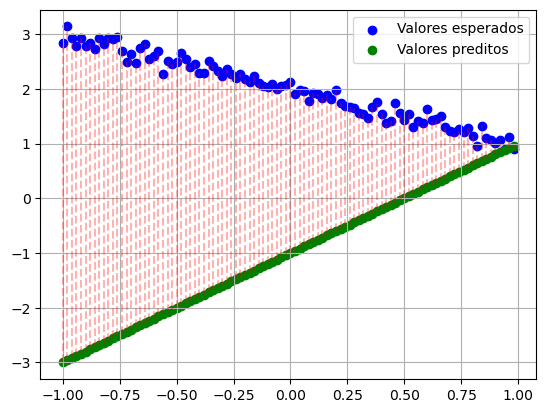

In [3]:
# Visualização do erro entre os valores esperados e preditos pela função hipótese.
plt.scatter(x, y, color='blue', label='Valores esperados')                    # valores esperados
plt.scatter(x, y_hat, color='green', label='Valores preditos')                # valores preditos
plt.vlines(x, ymin=np.minimum(y, y_hat), ymax=np.maximum(y, y_hat), color="red", linestyle='--', alpha=0.3)
plt.legend()
plt.grid()
plt.show()

Nós poderíamos simplesmente pegar a média das diferenças entre os os valores esperados e preditos para calcular o erro do modelo. No entanto, a presença de erros negativos faria com que alguns erros se cancelassem, não dando uma representação precisa do erro total. 

Portanto, a coisa mais inteligente a fazer aqui é elevar ao quadrado cada valor de erro individual e calcular a média de todos os erros individuais, ou seja, calcular o **MSE**.

In [4]:
# Vamos calcular o erro.
mse = 0
N = len(y) # Número total de amostras.
for i in range(0, N):
    squared_diff = (y[i] - y_hat[i]) ** 2
    mse += squared_diff

# Divide pelo número total de amostras.
mse /= N

print("MSE: " + str((mse)))

MSE: 12.120521110999999


## 2. Minimizando o erro

Nesta seção, iremos minimizar o erro do nosso modelo de regressão, treinando-o com os dados fornecidos.

Primeiro, nós importamos a biblioteca:

1.   [tensorflow](https://www.tensorflow.org/) - biblioteca de código aberto para criar e treinar modelos de ML.

In [5]:
import tensorflow as tf

Para treinar nosso modelo de regressão linear, precisamos primeiro definir 

+ (i) o modelo, 
+ (ii) a função de erro e 
+ (iii) o procedimento (i.e., algoritmo) de treinamento.

### Definindo o modelo de regressão linear

O modelo implementado abaixo representa a função hipótese $\hat{y} = a_0 + a_1 x$. 

Portanto, o modelo gera (**retorna**) um valor de $\hat{y}$ para determinados $a_0$, $a_1$ e $x$ quando é chamado.

In [6]:
# Definindo nosso palpite inicial.
A0_INICIAL = 10.0
A1_INICIAL = 10.0

# Define nosso modelo de regressão.
class Model(object):
    def __init__(self, a0=A0_INICIAL, a1=A1_INICIAL):
        # Inicializando os pesos como variáveis do Tensorflow.
        self.a0 = tf.Variable(a0)
        self.a1 = tf.Variable(a1)
    
    # O método call é chamado toda a vez que passamos um valor de x para o modelo.
    def __call__(self, x):
        return self.a0 + self.a1*x

**OBS**.: Dado uma valor de x, o método `__call__()` retorna um valor de $\hat{y}$. Sabemos que o melhor formato para a função hipótese, ou seja, o modelo, é $\hat{y} = a_0 + a_1 x$. Portanto, o método `__call__()` retorna `self.a0 + self.a1 * x`.

### Definindo a função de erro

Em seguida, definimos a função de erro, a qual irá retornar o erro quadrático médio (MSE).

A função do Tensorflow `tf.reduce_mean()` calcula a média do tensor (i.e., vetor/array) de entrada. Leia mais sobre ela [aqui](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean).

No caso do código abaixo, a função `tf.reduce_mean()` calcula a média dos erros individuais.

In [7]:
# Definindo nossa função de erro.
def erro(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

### Definindo o procedimento (algoritmo) de treinamento

Aqui, o algoritmo do gradiente descendente é usado para o treinamento do modelo.

Definimos uma função chamada `train` que executa uma **iteração do gradiente descendente** usando **todas** as amostras em nosso conjunto de dados (ou seja, usa todos os valores $x$ e $y$ disponíveis para treinamento).

Uma iteração do algoritmo de otimização do gradiente descendente envolve:

1. o cálculo do erro
2. o cálculo das derivadas da função de erro em relação ao pesos individuais (i.e., $a_0$ e $a_1$)
3. a atualização dos pesos do modelo com as derivadas calculadas (i.e., vetor gradiente)

**API Gradient Tape do TensorFlow**

O cálculo das derivadas parciais da função de erro em relação aos pesos é feito automaticamente por um objeto da classe `GradientTape()` do TensorFlow.

Você pode aprender mais sobre a classe `GradientTape()` em https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [8]:
# Definindo o processo de treinamento (ou atualização dos pesos)
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        # Erro atual.
        current_error = erro(model(inputs), outputs)

        # Aqui é onde diferenciamos a função de erro em relação aos pesos do modelo.
        da0, da1 = t.gradient(current_error, [model.a0, model.a1])      # derro/da0, derro/da1

        # E aqui é onde atualizamos os pesos do modelo com base no passo de aprendizagem escolhido.
        model.a0.assign_sub(learning_rate * da0)   # model.a0 = model.a0 - learning_rate*a0
        model.a1.assign_sub(learning_rate * da1)   # model.a1 = model.a1 - learning_rate*a1

        # Retorna o erro atual.
        return current_error

---


**Pergunta 3**: No código acima, antes de treinar o modelo, quais são as três coisas que precisamos definir?

**Resposta:**

---

---

**Pergunta 4**: Qual versão do gradiente descendente está implentada no código acima?

**Resposta:**

---

### Treinando o modelo

Agora que definimos todas as funções individuais que vamos precisar, é hora de juntá-las.

O conjunto de dados ($x$ e $y$) já foi definido anteriormente.

Inicialmente, definimos p passo de aprendizagem e o número de épocas de treinamento.

Em seguida, instanciamos o modelo. 

Na sequência, treinamos o modelo por várias épocas. Para cada época, calculamos e armazenamos os valores dos pesos ($a_0$ e $a_1$) e o erro.

Observe a diminuição do erro à medida que as épocas passam.

**OBS**.: Você vai precisar encontrar valores para o passo de aprendizagem e número de épocas de forma que o gradiente descendente convirja.

In [9]:
# Passo de aprendizagem.
LEARNING_RATE = 0.005

# Número de épocas.
epochs = 50

# Instancia o modelo.
model = Model()

# Coletando o histórico de valores a0 e a1 para plotar mais tarde.
list_a0, list_a1 = [], []
erros = []

# Laço (loop) de treinamento.
for epoch in range(epochs):
    
    # Armazena os valores dos pesos.
    list_a0.append(model.a0.numpy())
    list_a1.append(model.a1.numpy())
    
    # Iteração de treinamento.
    current_error = train(model, x, y, learning_rate=LEARNING_RATE)
    
    # Armzena os erros ao longo das épocas de treinamento.
    erros.append(current_error)
    
    # Imprime os erros ao longo das épocas de treinamento.
    print('Época %2d: a0=%1.2f a1=%1.2f, loss=%2.5f' % (epoch, list_a0[-1], list_a1[-1], current_error))

Época  0: a0=10.00 a1=10.00, loss=102.84038
Época  1: a0=9.92 a1=9.96, loss=101.34013
Época  2: a0=9.84 a1=9.93, loss=99.86611
Época  3: a0=9.77 a1=9.89, loss=98.41779
Época  4: a0=9.69 a1=9.86, loss=96.99471
Época  5: a0=9.61 a1=9.82, loss=95.59641
Época  6: a0=9.54 a1=9.79, loss=94.22238
Época  7: a0=9.46 a1=9.75, loss=92.87218
Época  8: a0=9.39 a1=9.72, loss=91.54537
Época  9: a0=9.32 a1=9.68, loss=90.24149
Época 10: a0=9.24 a1=9.65, loss=88.96013
Época 11: a0=9.17 a1=9.61, loss=87.70083
Época 12: a0=9.10 a1=9.58, loss=86.46321
Época 13: a0=9.03 a1=9.54, loss=85.24683
Época 14: a0=8.96 a1=9.51, loss=84.05132
Época 15: a0=8.89 a1=9.47, loss=82.87627
Época 16: a0=8.83 a1=9.44, loss=81.72129
Época 17: a0=8.76 a1=9.40, loss=80.58601
Época 18: a0=8.69 a1=9.37, loss=79.47006
Época 19: a0=8.63 a1=9.34, loss=78.37308
Época 20: a0=8.56 a1=9.30, loss=77.29471
Época 21: a0=8.50 a1=9.27, loss=76.23459
Época 22: a0=8.43 a1=9.24, loss=75.19239
Época 23: a0=8.37 a1=9.20, loss=74.16777
Época 24: a0

### Plote os valores dos pesos ao longo das épocas de treinamento.

Abaixo está um gráfico dos valores dos pesos do modelo $a_0$ e $a_1$ (eixo y) ao longo das épocas (eixo x). À medida que o modelo é treinado, observe como os valores de $a_0$ e $a_1$ se estabilizam em um valor.

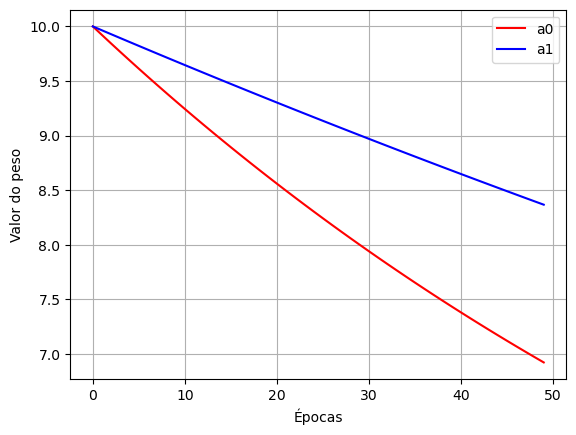

In [10]:
# Plote os valores de a0 e a1 para cada época de treinamento em relação aos valores verdadeiros.
xaxis = range(epochs)
plt.plot(xaxis, list_a0, 'r', xaxis, list_a1, 'b')
plt.legend(['a0', 'a1'])
plt.xlabel('Épocas')
plt.ylabel('Valor do peso')
plt.grid()
plt.show()

### Plote o MSE ao longo das épocas de treinamento

O gráfico abaixo mostra o MSE ao longo do treinamento do modelo.

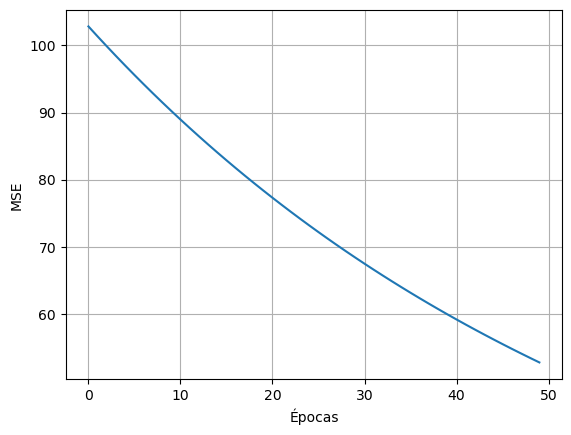

In [11]:
plt.plot(range(epochs), erros)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()

---

**Pergunta 5**: Após observar os últimos dois gráficos acima, podemos dizer que o algoritmo convergiu?

**Resposta:**

---

### Plote uma figura comparando os dados de treinamento e a melhor função hipótese.

In [12]:
# Digite o código de exercício aqui.

---

**Pergunta 6**: O que ocorreria se o passo de aprendizagem fosse feito igual a 1.1? Altere o valor e execute todas a células novamente.

**Resposta:**

---